# ***Imports and CSV read---> Categorical to Numerical type---> Null values removal***

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from keras.models import Model, Sequential
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Bidirectional, GRU, concatenate
from IPython.display import Image, display
import tempfile
from tensorflow.keras.utils import plot_model
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv(r"/content/Train_data.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [ ]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
train.shape

(25192, 42)

In [ ]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.describe(include="object")

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [ ]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


In [ ]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)
train.dropna(inplace=True)
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
train[numeric_cols].replace([np.inf, -np.inf], np.nan, inplace=True)
train.dropna(inplace=True)

In [ ]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


<Axes: xlabel='class', ylabel='count'>

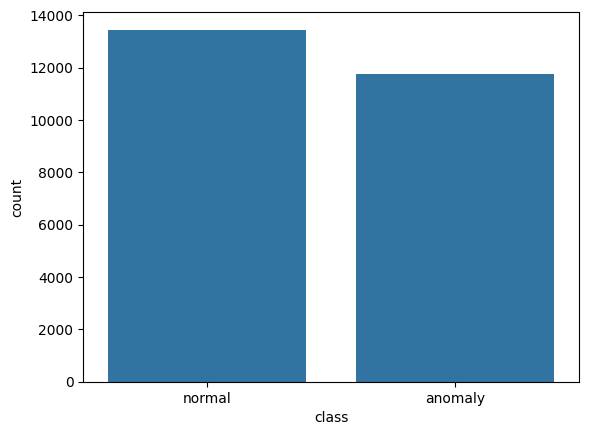

In [ ]:
sns.countplot(x=train['class'])

In [ ]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)

In [ ]:
train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [ ]:
train['class']

0        1
1        1
2        0
3        1
4        1
        ..
25187    0
25188    0
25189    0
25190    0
25191    0
Name: class, Length: 25192, dtype: int64

In [ ]:
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

if len(categorical_cols) > 0:
    print("Categorical columns still present in the DataFrame:")
    print(categorical_cols)
else:
    print("No categorical columns remaining in the DataFrame.")

No categorical columns remaining in the DataFrame.


In [ ]:
X_train = train.drop(['class'], axis=1)
Y_train = train['class']
X_train.shape

(25192, 41)

# **Feature Selection**

In [ ]:
# Initialize the Random Forest Classifier
rfc = RandomForestClassifier()

# Initialize RFE to select 10 features
rfe = RFE(estimator=rfc, n_features_to_select=10)

# Fit RFE on your training data
rfe.fit(X_train, Y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
selected_features

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'count',
       'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

# Get feature importances
feature_importances = rfc.feature_importances_

# Combine with feature names
feature_importance_map = dict(zip(X_train.columns, feature_importances))

# Sort features by importance
sorted_features = sorted(feature_importance_map.items(), key=lambda x: x[1], reverse=True)

# Print top features
# top_features = sorted_features[:10]  # Change the number to get a different count of top features
# top_features
sorted_features
# top_features = sorted_features[:10]  # Change the number to get a different count of top features
top_features=[feature[0] for feature in sorted_features[:10]]
top_features

['dst_bytes',
 'src_bytes',
 'flag',
 'same_srv_rate',
 'count',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'diff_srv_rate',
 'dst_host_diff_srv_rate',
 'logged_in']

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Initialize SelectKBest
k_best = SelectKBest(score_func=chi2, k=10)  # Change k to get a different count of top features

# Fit SelectKBest on your data
X_k_best = k_best.fit_transform(X_train, Y_train)

# Get selected feature indices
selected_indices = k_best.get_support(indices=True)

# Get corresponding feature names
selected_feature = X_train.columns[selected_indices]
selected_feature

Index(['duration', 'service', 'flag', 'src_bytes', 'dst_bytes', 'count',
       'srv_serror_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_srv_serror_rate'],
      dtype='object')

In [ ]:
combined_features = list(set(selected_features).union(set(selected_feature)).union(set(top_features)))
combined_features

['srv_serror_rate',
 'protocol_type',
 'dst_host_serror_rate',
 'dst_host_diff_srv_rate',
 'flag',
 'diff_srv_rate',
 'same_srv_rate',
 'dst_host_srv_count',
 'duration',
 'logged_in',
 'dst_bytes',
 'service',
 'src_bytes',
 'dst_host_srv_serror_rate',
 'dst_host_same_srv_rate',
 'dst_host_count',
 'count']

In [ ]:
feature_count = {}
for feature in combined_features:
    feature_count[feature] = feature_count.get(feature, 0) + 1

In [ ]:
total = sorted(feature_count.items(), key=lambda x: x[1], reverse=True)
total

[('srv_serror_rate', 1),
 ('protocol_type', 1),
 ('dst_host_serror_rate', 1),
 ('dst_host_diff_srv_rate', 1),
 ('flag', 1),
 ('diff_srv_rate', 1),
 ('same_srv_rate', 1),
 ('dst_host_srv_count', 1),
 ('duration', 1),
 ('logged_in', 1),
 ('dst_bytes', 1),
 ('service', 1),
 ('src_bytes', 1),
 ('dst_host_srv_serror_rate', 1),
 ('dst_host_same_srv_rate', 1),
 ('dst_host_count', 1),
 ('count', 1)]

In [ ]:
final_features = [feature[0] for feature in total[:10]]
final_features

['srv_serror_rate',
 'protocol_type',
 'dst_host_serror_rate',
 'dst_host_diff_srv_rate',
 'flag',
 'diff_srv_rate',
 'same_srv_rate',
 'dst_host_srv_count',
 'duration',
 'logged_in']

In [ ]:
final=X_train[final_features]
final.shape

(25192, 10)

# ***Splitting the data to Test and Train***

In [ ]:
# Splitting the dataset into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(final, Y_train, test_size=0.3, random_state=42)

In [ ]:
final1=final.to_numpy()
final1

array([[ 0.,  1.,  0., ..., 25.,  0.,  0.],
       [ 0.,  2.,  0., ...,  1.,  0.,  0.],
       [ 1.,  1.,  1., ..., 26.,  0.,  0.],
       ...,
       [ 0.,  1.,  0., ..., 13.,  0.,  0.],
       [ 1.,  1.,  1., ..., 20.,  0.,  0.],
       [ 1.,  1.,  1., ..., 49.,  0.,  0.]])

In [ ]:
x_train.shape

(17634, 10)

In [ ]:
x_val.shape

(7558, 10)

# ***Label Encoding- feature encoding***

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [ ]:
y_val_encoded.shape

(7558,)

# ***CNN Accuracy--------> 3min***

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(final.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
# Add more Conv1D and Pooling layers as needed
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary_crossentropy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_encoded,epochs=50,batch_size=16,validation_data=(x_val, y_val_encoded))

Epoch 1/50
1260/1260 [==============================] - 5s 3ms/step - loss: 1331.6138 - accuracy: 0.8785 - val_loss: 37.9562 - val_accuracy: 0.9329
Epoch 2/50
1260/1260 [==============================] - 4s 3ms/step - loss: 499.4422 - accuracy: 0.9019 - val_loss: 280.4588 - val_accuracy: 0.9097
Epoch 3/50
1260/1260 [==============================] - 4s 3ms/step - loss: 1890.3086 - accuracy: 0.9039 - val_loss: 328.9336 - val_accuracy: 0.9436
Epoch 4/50
1260/1260 [==============================] - 3s 3ms/step - loss: 375.8593 - accuracy: 0.9173 - val_loss: 13.0959 - val_accuracy: 0.9417
Epoch 5/50
1260/1260 [==============================] - 3s 3ms/step - loss: 115.9373 - accuracy: 0.9242 - val_loss: 119.5609 - val_accuracy: 0.9500
Epoch 6/50
1260/1260 [==============================] - 4s 3ms/step - loss: 391.8956 - accuracy: 0.9167 - val_loss: 129.9644 - val_accuracy: 0.9303
Epoch 7/50
1260/1260 [==============================] - 4s 3ms/step - loss: 52.5638 - accuracy: 0.9255 - val_los

In [ ]:
x_val.shape

(7558, 10)

In [ ]:
# Assuming you have a trained Keras model 'model' and your test dataset 'X_test'
predictions = model.predict(x_val)
predictions

158/158 [==============================] - 0s 2ms/step


array([[8.2229507e-01],
       [8.2229507e-01],
       [1.4961943e-09],
       ...,
       [9.4194227e-01],
       [9.9765038e-01],
       [9.8478359e-01]], dtype=float32)

In [ ]:
predicted_classes = (predictions > 0.5).astype('int32')
predicted_classes.shape

(5039, 1)

In [ ]:
accuracy=accuracy_score(y_val_encoded, predicted_classes)
report=classification_report(y_val_encoded, predicted_classes)
print(f"Accuracy: {accuracy}")
print(f"Report: {report}")

Accuracy: 0.9462194879936495
Report:               precision    recall  f1-score   support

           0       0.99      0.89      0.94      2365
           1       0.91      0.99      0.95      2674

    accuracy                           0.95      5039
   macro avg       0.95      0.94      0.95      5039
weighted avg       0.95      0.95      0.95      5039



# ***GRU Accuracy--------> 8min***

In [ ]:
# Train GRU model
gru_model = Sequential()
gru_model.add(GRU(64, input_shape=(final.shape[1], 1)))
gru_model.add(Dense(1, activation='sigmoid'))
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_model.fit(x_train, y_train_encoded, epochs=50, batch_size=16, validation_data=(x_val, y_val_encoded))

Epoch 1/50
1260/1260 [==============================] - 13s 8ms/step - loss: 0.1603 - accuracy: 0.9410 - val_loss: 0.0889 - val_accuracy: 0.9673
Epoch 2/50
1260/1260 [==============================] - 10s 8ms/step - loss: 0.0871 - accuracy: 0.9653 - val_loss: 0.0751 - val_accuracy: 0.9669
Epoch 3/50
1260/1260 [==============================] - 11s 8ms/step - loss: 0.0716 - accuracy: 0.9731 - val_loss: 0.0742 - val_accuracy: 0.9722
Epoch 4/50
1260/1260 [==============================] - 11s 9ms/step - loss: 0.0594 - accuracy: 0.9785 - val_loss: 0.0383 - val_accuracy: 0.9879
Epoch 5/50
1260/1260 [==============================] - 9s 7ms/step - loss: 0.0512 - accuracy: 0.9831 - val_loss: 0.0500 - val_accuracy: 0.9823
Epoch 6/50
1260/1260 [==============================] - 10s 8ms/step - loss: 0.0449 - accuracy: 0.9850 - val_loss: 0.0392 - val_accuracy: 0.9829
Epoch 7/50
1260/1260 [==============================] - 11s 8ms/step - loss: 0.0371 - accuracy: 0.9878 - val_loss: 0.0339 - val_acc

In [ ]:
gru_predict = gru_model.predict(x_val)
gru_class = (gru_predict > 0.5).astype('int32')

158/158 [==============================] - 1s 4ms/step


In [ ]:
gru_accuracy=accuracy_score(y_val_encoded, gru_class)
gru_report=classification_report(y_val_encoded, gru_class)
print(f"Accuracy: {gru_accuracy}")
print(f"Report: {gru_report}")

Accuracy: 0.9966263147449891
Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2365
           1       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



# ***Bidirectional GRU Accuracy--------> 13min***

In [ ]:
# Train Bidirectional GRU model
bidirectional_gru_model = Sequential()
bidirectional_gru_model.add(Bidirectional(GRU(64), input_shape=(final.shape[1], 1)))
bidirectional_gru_model.add(Dense(1, activation='sigmoid'))
bidirectional_gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
bidirectional_gru_model.fit(x_train, y_train_encoded, epochs=50, batch_size=16, validation_data=(x_val, y_val_encoded))

Epoch 1/50
1260/1260 [==============================] - 35s 24ms/step - loss: 0.1622 - accuracy: 0.9416 - val_loss: 0.0812 - val_accuracy: 0.9698
Epoch 2/50
1260/1260 [==============================] - 17s 13ms/step - loss: 0.0812 - accuracy: 0.9693 - val_loss: 0.0587 - val_accuracy: 0.9762
Epoch 3/50
1260/1260 [==============================] - 14s 11ms/step - loss: 0.0668 - accuracy: 0.9759 - val_loss: 0.0438 - val_accuracy: 0.9861
Epoch 4/50
1260/1260 [==============================] - 14s 11ms/step - loss: 0.0546 - accuracy: 0.9805 - val_loss: 0.0359 - val_accuracy: 0.9887
Epoch 5/50
1260/1260 [==============================] - 14s 11ms/step - loss: 0.0459 - accuracy: 0.9838 - val_loss: 0.0372 - val_accuracy: 0.9881
Epoch 6/50
1260/1260 [==============================] - 15s 12ms/step - loss: 0.0410 - accuracy: 0.9856 - val_loss: 0.0335 - val_accuracy: 0.9871
Epoch 7/50
1260/1260 [==============================] - 14s 11ms/step - loss: 0.0401 - accuracy: 0.9867 - val_loss: 0.0298 -

In [ ]:
bidirectional_predict = bidirectional_gru_model.predict(x_val)
bidirectional_class = (bidirectional_predict > 0.5).astype('int32')

158/158 [==============================] - 3s 7ms/step


In [ ]:
bidirectional_accuracy=accuracy_score(y_val_encoded, bidirectional_class)
bidirectional_report=classification_report(y_val_encoded, bidirectional_class)
print(f"Accuracy: {bidirectional_accuracy}")
print(f"Report: {bidirectional_report}")

Accuracy: 0.9934510815638024
Report:               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2365
           1       0.99      1.00      0.99      2674

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



# ***CNN-GRU Combined Accuracy--------> 10min***

In [ ]:
input_layer = Input(shape=(final.shape[1], 1))

# CNN part
cnn_layer = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
cnn_layer = MaxPooling1D(pool_size=2)(cnn_layer)
cnn_layer = Flatten()(cnn_layer)

# GRU part
gru_layer = GRU(64)(input_layer)

# Concatenate the output of CNN and GRU
merged_layer = concatenate([cnn_layer, gru_layer])

# Dense layers
dense_layer = Dense(128, activation='relu')(merged_layer)
dense_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

# Create the combined model
cnn_gru_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
cnn_gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the combined model
cnn_gru_model.fit(x_train, y_train_encoded, epochs=50, batch_size=16, validation_data=(x_val, y_val_encoded))


Epoch 1/50
1103/1103 [==============================] - 13s 10ms/step - loss: 3.3359 - accuracy: 0.8678 - val_loss: 0.3545 - val_accuracy: 0.9131
Epoch 2/50
1103/1103 [==============================] - 10s 9ms/step - loss: 0.2385 - accuracy: 0.9088 - val_loss: 0.1962 - val_accuracy: 0.9283
Epoch 3/50
1103/1103 [==============================] - 9s 8ms/step - loss: 0.1919 - accuracy: 0.9351 - val_loss: 0.1426 - val_accuracy: 0.9528
Epoch 4/50
1103/1103 [==============================] - 10s 9ms/step - loss: 0.2194 - accuracy: 0.9422 - val_loss: 0.1305 - val_accuracy: 0.9557
Epoch 5/50
1103/1103 [==============================] - 10s 9ms/step - loss: 0.1821 - accuracy: 0.9440 - val_loss: 0.1273 - val_accuracy: 0.9563
Epoch 6/50
1103/1103 [==============================] - 9s 9ms/step - loss: 0.1670 - accuracy: 0.9471 - val_loss: 0.1279 - val_accuracy: 0.9561
Epoch 7/50
1103/1103 [==============================] - 10s 9ms/step - loss: 0.1772 - accuracy: 0.9482 - val_loss: 0.1300 - val_acc

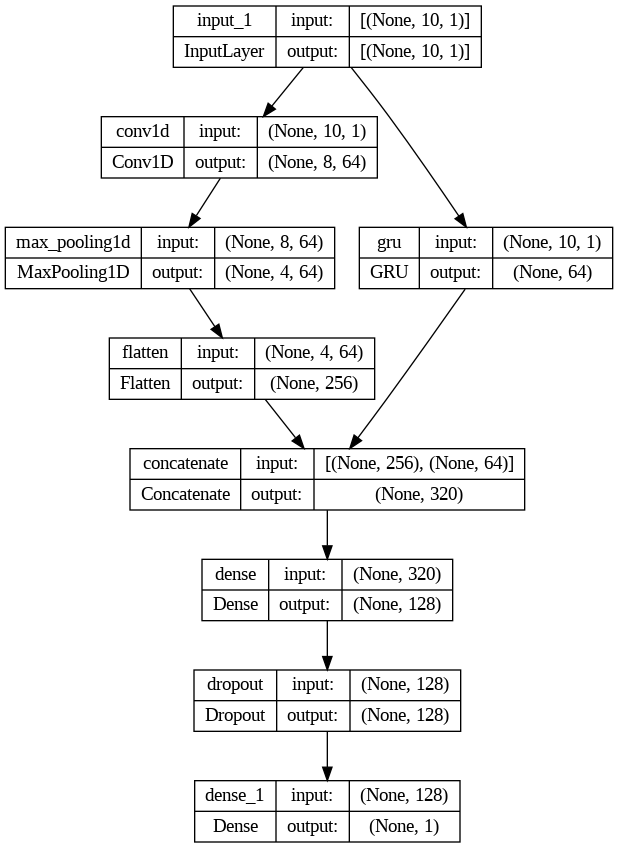

In [ ]:
with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as tmpfile:
    plot_model(cnn_gru_model, to_file=tmpfile.name, show_shapes=True, show_layer_names=True)
    display(Image(tmpfile.name))

In [ ]:
cnn_gru = cnn_gru_model.predict(x_val)
cnn_gru_class = (cnn_gru > 0.5).astype('int32')

158/158 [==============================] - 1s 3ms/step


In [ ]:
cnn_gru_accuracy=accuracy_score(y_val_encoded, cnn_gru_class)
cnn_gru_report=classification_report(y_val_encoded, cnn_gru_class)
print(f"Accuracy: {cnn_gru_accuracy}")
print(f"Report: {cnn_gru_report}")

Accuracy: 0.981543957134352
Report:               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2365
           1       0.97      0.99      0.98      2674

    accuracy                           0.98      5039
   macro avg       0.98      0.98      0.98      5039
weighted avg       0.98      0.98      0.98      5039



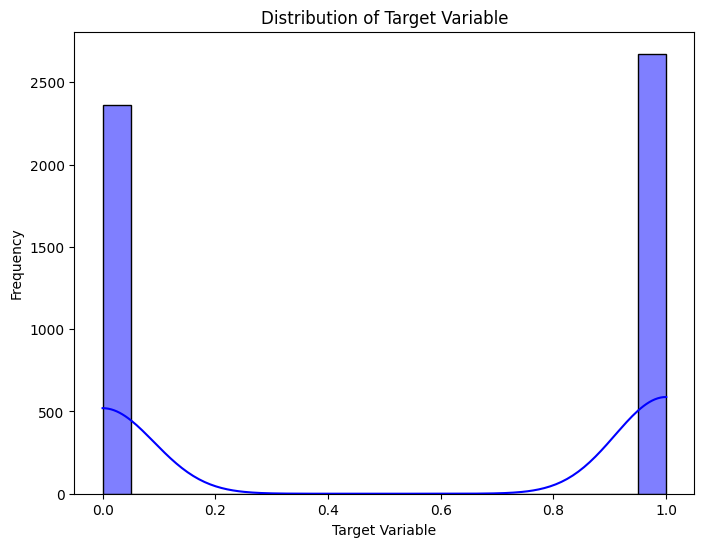

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.histplot(data=y_val_encoded, bins=20, kde=True, color='blue')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.show()

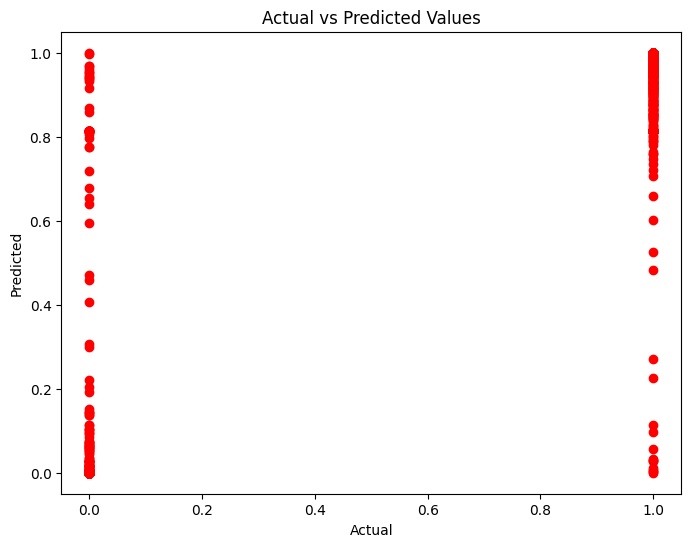

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val_encoded, cnn_gru, color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
y_val_encoded.shape

(5039,)

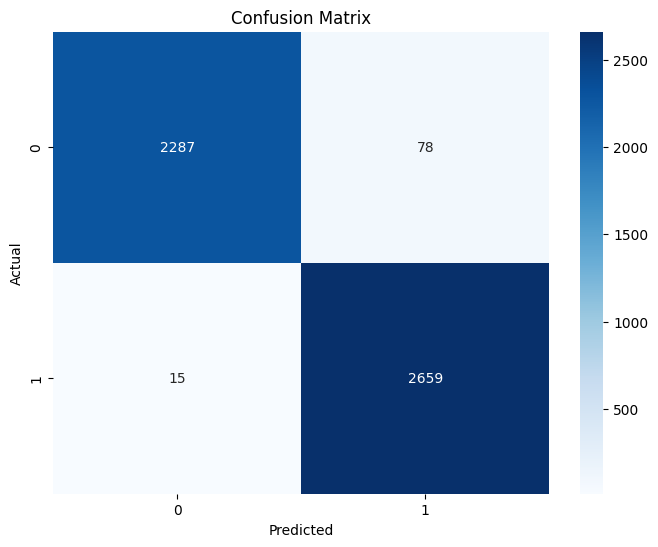

In [ ]:
cnn_gru_discrete = (cnn_gru > 0.5).astype(int)
conf_matrix = confusion_matrix(y_val_encoded, cnn_gru_discrete)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val_encoded), yticklabels=np.unique(y_val_encoded))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

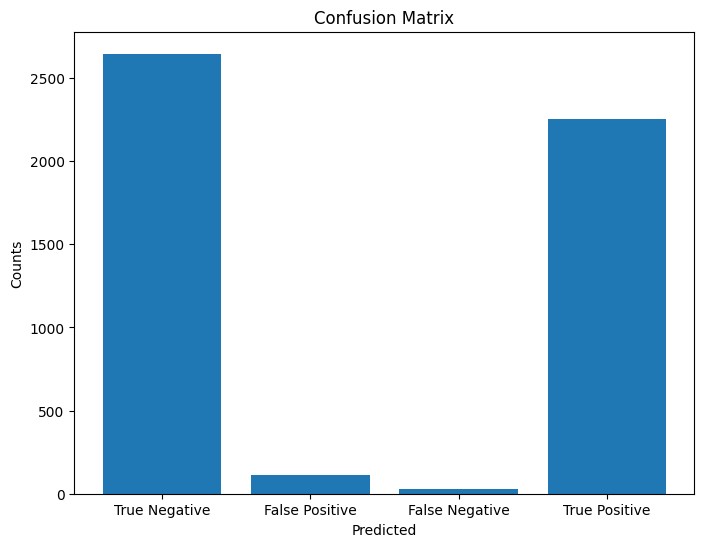

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example confusion matrix
conf_matrix = np.array([[2647, 110],
                        [27, 2255]])

# Extracting values from the confusion matrix
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()

# Plotting the confusion matrix as a bar plot
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values = [true_negative, false_positive, false_negative, true_positive]

plt.figure(figsize=(8, 6))
plt.bar(labels, values)
plt.xlabel('Predicted')
plt.ylabel('Counts')
plt.title('Confusion Matrix')
plt.show()


# ***CNN-Bidirectiona GRU Combined Accuracy--------> 29min 33sec***

In [ ]:
input_layer = Input(shape=(final.shape[1], 1))

# CNN part
cnn_layer = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
cnn_layer = MaxPooling1D(pool_size=2)(cnn_layer)
cnn_layer = Flatten()(cnn_layer)

# Bi-GRU part
bi_gru_layer = Bidirectional(GRU(64, return_sequences=True))(input_layer)
bi_gru_layer = Bidirectional(GRU(64))(bi_gru_layer)

# Concatenate the output of CNN and Bi-GRU
merged_layer = concatenate([cnn_layer, bi_gru_layer])

# Dense layers
dense_layer = Dense(128, activation='relu')(merged_layer)
dense_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

# Create the combined model
combined_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
combined_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the combined model
combined_model.fit(x_train, y_train_encoded, epochs=50, batch_size=16, validation_data=(x_val, y_val_encoded))


Epoch 1/50
1260/1260 [==============================] - 46s 29ms/step - loss: 312.7972 - accuracy: 0.9074 - val_loss: 651.0630 - val_accuracy: 0.9595
Epoch 2/50
1260/1260 [==============================] - 34s 27ms/step - loss: 994.3588 - accuracy: 0.9336 - val_loss: 636.8628 - val_accuracy: 0.9464
Epoch 3/50
1260/1260 [==============================] - 38s 30ms/step - loss: 2736.1248 - accuracy: 0.9350 - val_loss: 322.0369 - val_accuracy: 0.9645
Epoch 4/50
1260/1260 [==============================] - 36s 28ms/step - loss: 2325.1692 - accuracy: 0.9398 - val_loss: 326.0858 - val_accuracy: 0.9605
Epoch 5/50
1260/1260 [==============================] - 33s 26ms/step - loss: 1092.9406 - accuracy: 0.9447 - val_loss: 214.5855 - val_accuracy: 0.9675
Epoch 6/50
1260/1260 [==============================] - 34s 27ms/step - loss: 1023.4137 - accuracy: 0.9518 - val_loss: 51.6193 - val_accuracy: 0.9625
Epoch 7/50
1260/1260 [==============================] - 35s 28ms/step - loss: 1769.4558 - accurac

In [ ]:
cnn_bigru = combined_model.predict(x_val)
cnn_bigru_class = (cnn_bigru > 0.5).astype('int32')

158/158 [==============================] - 3s 7ms/step


In [ ]:
cnn_bigru_accuracy=accuracy_score(y_val_encoded, cnn_bigru_class)
cnn_bigru_report=classification_report(y_val_encoded, cnn_bigru_class)
print(f"Accuracy: {cnn_bigru_accuracy}")
print(f"Report: {cnn_bigru_report}")

Accuracy: 0.9793609843222861
Report:               precision    recall  f1-score   support

           0       1.00      0.96      0.98      2365
           1       0.97      1.00      0.98      2674

    accuracy                           0.98      5039
   macro avg       0.98      0.98      0.98      5039
weighted avg       0.98      0.98      0.98      5039

